[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


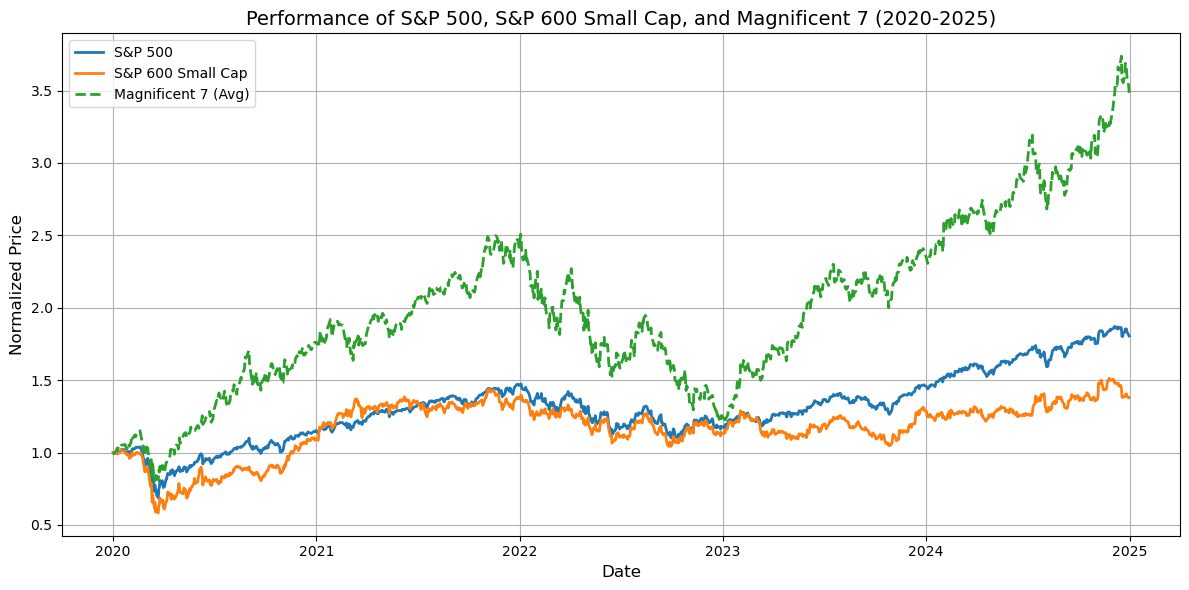

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "^GSPC"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap
magnificent7_tickers = ["NVDA", "META", "TSLA", "AMZN", "GOOG", "MSFT", "AAPL"]

# Define start and end dates
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download data for SP500 and SP600
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]

# Download data for Magnificent 7 and calculate average performance
magnificent7_data = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]
magnificent7_mean = magnificent7_data.mean(axis=1)

# Normalize data for comparison
sp500_norm = sp500_data / sp500_data.iloc[0]
sp600_norm = sp600_data / sp600_data.iloc[0]
magnificent7_norm = magnificent7_mean / magnificent7_mean.iloc[0]

# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(sp500_norm, label="S&P 500", linewidth=2)
plt.plot(sp600_norm, label="S&P 600 Small Cap", linewidth=2)
plt.plot(magnificent7_norm, label="Magnificent 7 (Avg)", linewidth=2, linestyle="--")
plt.title("Performance of S&P 500, S&P 600 Small Cap, and Magnificent 7 (2020-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


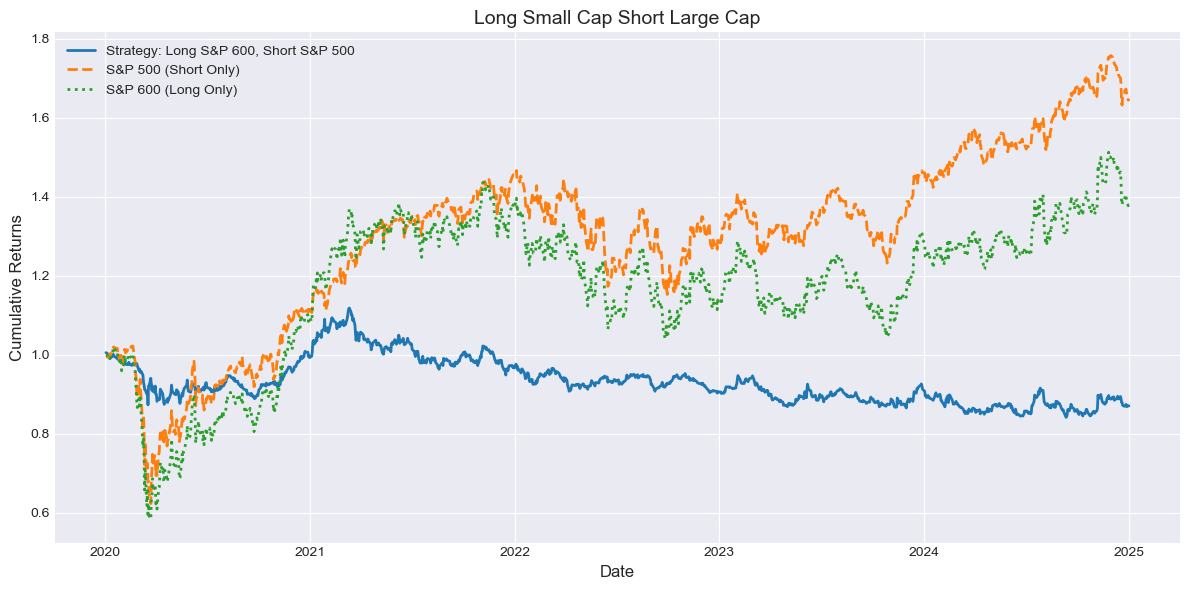

Annualized Strategy Return: -0.021651195904814548
Annualized Strategy Volatility: 0.11022835433181725
Sharpe Ratio: -0.19642129319683552


In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "RSP"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap

# Define start and end dates
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download data
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
sp500_returns = sp500_data.pct_change()
sp600_returns = sp600_data.pct_change()

# Strategy: Long S&P 600, Short S&P 500
strategy_returns = sp600_returns - sp500_returns

# Calculate cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod()
sp500_cumulative = (1 + sp500_returns).cumprod()
sp600_cumulative = (1 + sp600_returns).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label="Strategy: Long S&P 600, Short S&P 500", linewidth=2)
plt.plot(sp500_cumulative, label="S&P 500 (Short Only)", linewidth=2, linestyle="--")
plt.plot(sp600_cumulative, label="S&P 600 (Long Only)", linewidth=2, linestyle=":")
plt.title("Long Small Cap Short Large Cap", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategy statistics
print("Annualized Strategy Return:", strategy_returns.mean() * 252)
print("Annualized Strategy Volatility:", strategy_returns.std() * (252 ** 0.5))
print("Sharpe Ratio:", (strategy_returns.mean() / strategy_returns.std()) * (252 ** 0.5))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


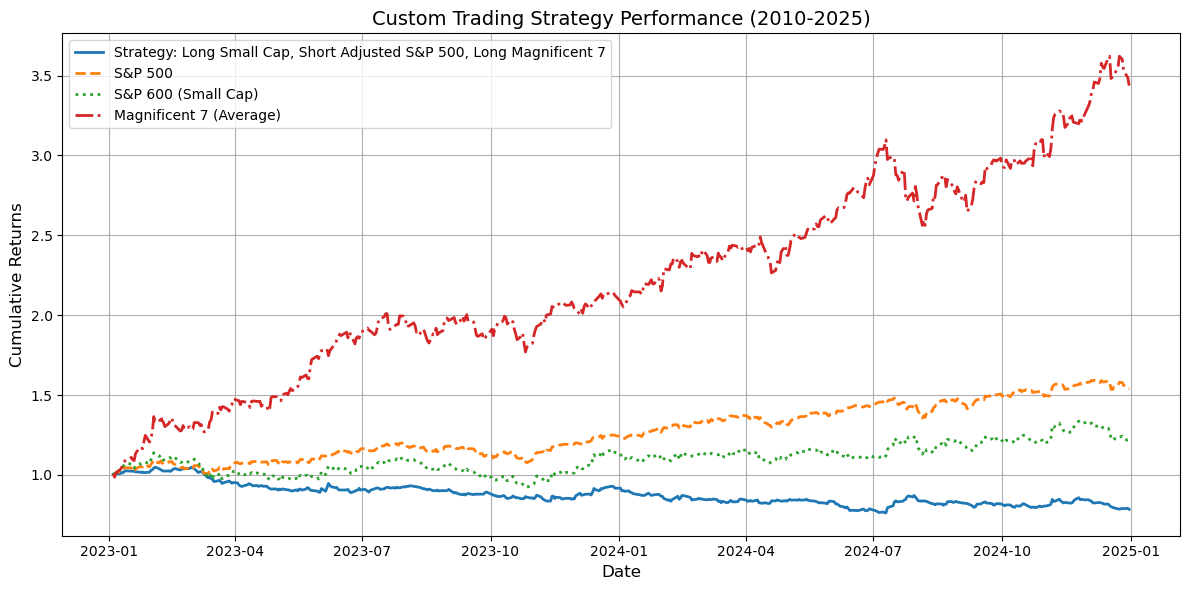

Annualized Strategy Return: -0.11281727534796407
Annualized Strategy Volatility: 0.13644181632210528
Sharpe Ratio: -0.826852634984208


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "^GSPC"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap
magnificent7_tickers = ["NVDA", "META", "TSLA", "AMZN", "GOOG", "MSFT", "AAPL"]

# Define start and end dates
start_date = "2023-01-01"
end_date = "2025-01-01"

# Download data
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]
magnificent7_data = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns 
sp500_returns = sp500_data.pct_change()
sp600_returns = sp600_data.pct_change()
magnificent7_returns = magnificent7_data.pct_change()

# Function to calculate yearly weights based on market cap
def calculate_weights(prices):
    market_caps = prices.iloc[-1]  # Use last available price as proxy for market cap
    total_market_cap = market_caps.sum()
    return market_caps / total_market_cap

# Initialize yearly rebalancing
rebalance_dates = sp500_data.resample('Y').last().index
weights = {}

for date in rebalance_dates:
    # Get last available data for the year
    if date in magnificent7_data.index:
        year_data = magnificent7_data.loc[:date]
        magnificent7_weights = calculate_weights(year_data)
        sp500_weight = 1 - magnificent7_weights.sum()
        weights[date] = {"magnificent7": magnificent7_weights, "sp500": sp500_weight}

# Adjust S&P 500 to exclude Magnificent 7
sp500_adjusted_returns = sp500_returns.copy()
for date in weights.keys():
    if date in sp500_adjusted_returns.index:
        magnificent7_weighted_return = (magnificent7_returns.loc[date] * weights[date]["magnificent7"]).sum()
        sp500_adjusted_returns.loc[date] -= magnificent7_weighted_return

# Strategy: Long S&P 600, Short adjusted S&P 500, Long Magnificent 7
strategy_returns = sp600_returns - sp500_adjusted_returns + magnificent7_returns.mean(axis=1)

# Calculate cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod()
sp500_cumulative = (1 + sp500_returns).cumprod()
sp600_cumulative = (1 + sp600_returns).cumprod()
magnificent7_cumulative = (1 + magnificent7_returns.mean(axis=1)).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label="Strategy: Long Small Cap, Short Adjusted S&P 500, Long Magnificent 7", linewidth=2)
plt.plot(sp500_cumulative, label="S&P 500", linewidth=2, linestyle="--")
plt.plot(sp600_cumulative, label="S&P 600 (Small Cap)", linewidth=2, linestyle=":")
plt.plot(magnificent7_cumulative, label="Magnificent 7 (Average)", linewidth=2, linestyle="-.")
plt.title("Custom Trading Strategy Performance (2010-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategy statistics
print("Annualized Strategy Return:", strategy_returns.mean() * 252)
print("Annualized Strategy Volatility:", strategy_returns.std() * (252 ** 0.5))
print("Sharpe Ratio:", (strategy_returns.mean() / strategy_returns.std()) * (252 ** 0.5))


[*********************100%%**********************]  7 of 7 completed


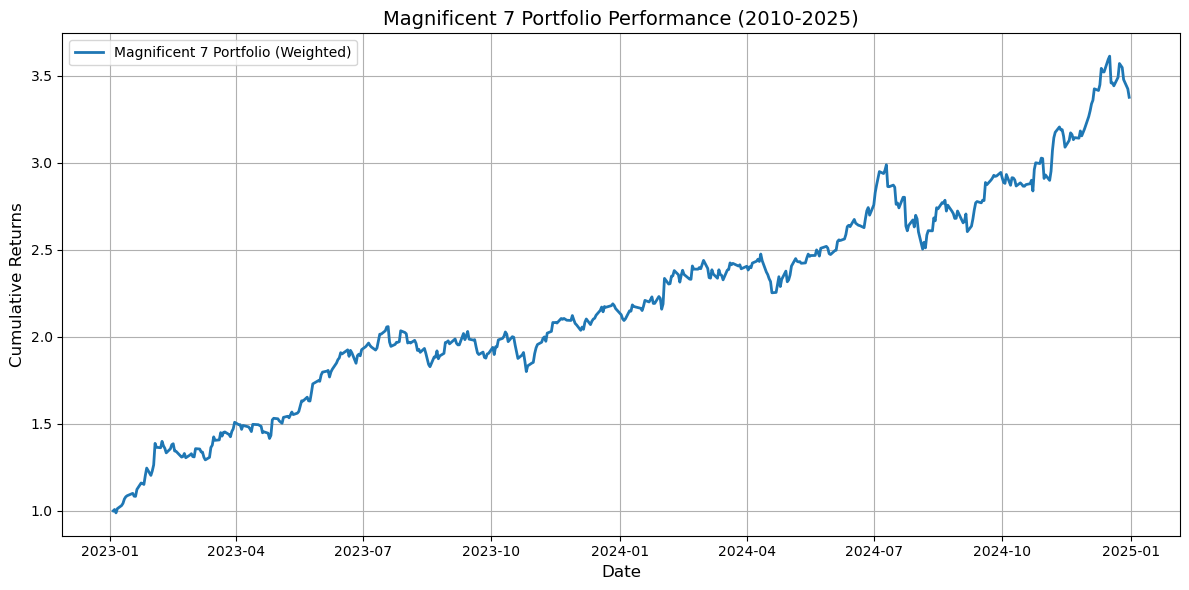

Annualized Return: 0.6448029074693246
Annualized Volatility: 0.25877610757857233
Sharpe Ratio: 2.4917404991631336


In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
magnificent7_tickers = ["NVDA", "META", "TSLA", "AMZN", "GOOG", "MSFT", "AAPL"]

# Define start and end dates
start_date = "2023-01-01"
end_date = "2025-01-01"

# Download data
magnificent7_data = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
magnificent7_returns = magnificent7_data.pct_change()

# Function to calculate yearly weights based on market cap
def calculate_weights(prices):
    market_caps = prices.iloc[-1]  # Use last available price as proxy for market cap
    total_market_cap = market_caps.sum()
    return market_caps / total_market_cap

# Initialize yearly rebalancing
rebalance_dates = magnificent7_data.resample('Y').last().index
weighted_returns = pd.Series(0, index=magnificent7_returns.index)

for date in rebalance_dates:
    if date in magnificent7_data.index:
        year_data = magnificent7_data.loc[:date]
        weights = calculate_weights(year_data)
        yearly_returns = magnificent7_returns.loc[year_data.index] * weights
        weighted_returns.loc[yearly_returns.index] += yearly_returns.sum(axis=1)

# Calculate cumulative returns for the Magnificent 7 portfolio
cumulative_returns = (1 + weighted_returns).cumprod()

# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Magnificent 7 Portfolio (Weighted)", linewidth=2)
plt.title("Magnificent 7 Portfolio Performance (2010-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Sharpe Ratio
annualized_return = weighted_returns.mean() * 252
annualized_volatility = weighted_returns.std() * (252 ** 0.5)
sharpe_ratio = annualized_return / annualized_volatility

print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)
print("Sharpe Ratio:", sharpe_ratio)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


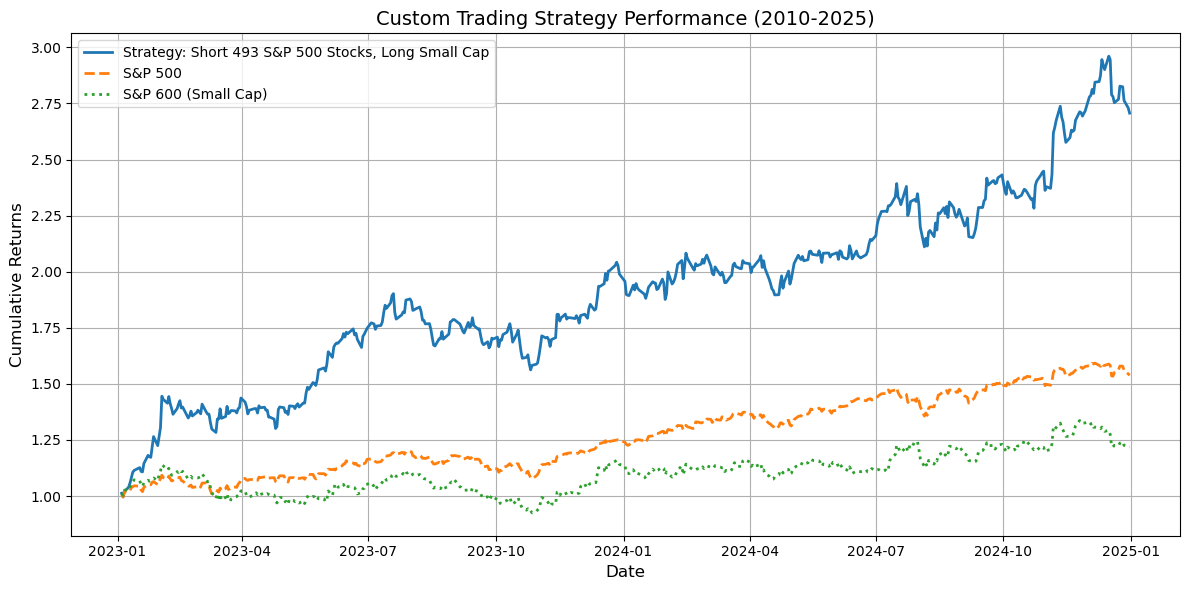

Annualized Strategy Return: 0.5403697621950043
Annualized Strategy Volatility: 0.2806419641054064
Sharpe Ratio: 1.9254774100428067


In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "^GSPC"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap
magnificent7_tickers = ["NVDA", "META", "TSLA", "AMZN", "GOOG", "MSFT", "AAPL"]

# Define start and end dates
start_date = "2023-01-01"
end_date = "2025-01-01"

# Download data
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]
magnificent7_data = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
sp500_returns = sp500_data.pct_change()
sp600_returns = sp600_data.pct_change()
magnificent7_returns = magnificent7_data.pct_change()

# Function to calculate yearly weights based on market cap
def calculate_weights(prices):
    market_caps = prices.iloc[-1]  # Use last available price as proxy for market cap
    total_market_cap = market_caps.sum()
    return market_caps / total_market_cap

# Initialize yearly rebalancing
rebalance_dates = sp500_data.resample('Y').last().index
adjusted_sp500_returns = sp500_returns.copy()

for date in rebalance_dates:
    if date in magnificent7_data.index:
        # Calculate weights for Magnificent 7
        year_data = magnificent7_data.loc[:date]
        magnificent7_weights = calculate_weights(year_data)
        # Subtract Magnificent 7 weighted returns from S&P 500 to get returns of the other 493 stocks
        magnificent7_weighted_return = (magnificent7_returns.loc[year_data.index] * magnificent7_weights).sum(axis=1)
        adjusted_sp500_returns.loc[year_data.index] -= magnificent7_weighted_return

# Strategy: Short adjusted S&P 500 (493 stocks), Long S&P 600 (Small Cap)
strategy_returns = sp600_returns - adjusted_sp500_returns

# Calculate cumulative returns for the strategy
strategy_cumulative = (1 + strategy_returns).cumprod()
sp500_cumulative = (1 + sp500_returns).cumprod()
sp600_cumulative = (1 + sp600_returns).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label="Strategy: Short 493 S&P 500 Stocks, Long Small Cap", linewidth=2)
plt.plot(sp500_cumulative, label="S&P 500", linewidth=2, linestyle="--")
plt.plot(sp600_cumulative, label="S&P 600 (Small Cap)", linewidth=2, linestyle=":")
plt.title("Custom Trading Strategy Performance (2023-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategy statistics
annualized_return = strategy_returns.mean() * 252
annualized_volatility = strategy_returns.std() * (252 ** 0.5)
sharpe_ratio = annualized_return / annualized_volatility

print("Annualized Strategy Return:", annualized_return)
print("Annualized Strategy Volatility:", annualized_volatility)
print("Sharpe Ratio:", sharpe_ratio)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


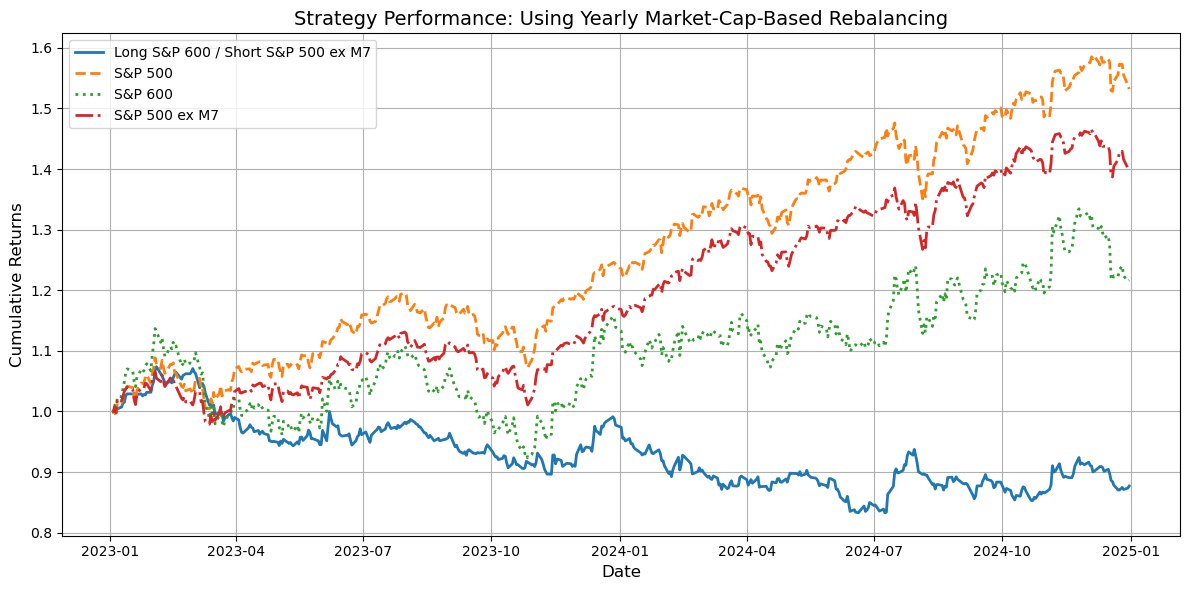

Annualized Strategy Return: -5.76%
Annualized Strategy Volatility: 12.94%
Sharpe Ratio: -0.44


In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# USER INPUTS / DATA FETCH
# ---------------------------------------------
start_date = "2022-01-01"
end_date   = "2025-01-01"

sp500_ticker = "^GSPC"    # S&P 500 Index
sp600_ticker = "^SP600"   # S&P 600 Small Cap
magnificent7_tickers = ["AAPL","MSFT","GOOG","AMZN","META","TSLA","NVDA"]

# 1) Download daily price data
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]
m7_prices  = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]

# 2) Compute daily returns
sp500_returns = sp500_data.pct_change().dropna()
sp600_returns = sp600_data.pct_change().dropna()
m7_returns    = m7_prices.pct_change().dropna()

# ---------------------------------------------
# 2. Historical Shares Outstanding (Hypothetical)
# ---------------------------------------------
# Typically, you'd read this from a file or a database.
# For demonstration, we'll create a toy DataFrame where each row is the last day of a year,
# and each column is shares outstanding for that ticker.
# Real code would have actual share counts, not these made-up numbers.

toy_shares_data = {
    "AAPL": [16.0e9, 15.8e9, 15.5e9],  # hypothetical shares for 2022, 2023, 2024
    "MSFT": [7.5e9,  7.3e9,  7.1e9],
    "GOOG": [6.2e9,  6.2e9,  6.0e9],
    "AMZN": [10.2e9, 10.0e9, 9.8e9],
    "META": [2.8e9,  2.8e9,  2.7e9],
    "TSLA": [3.2e9,  3.3e9,  3.4e9],
    "NVDA": [2.4e9,  2.3e9,  2.2e9]
}
# Index by the 'rebalance date' (the last day of each year prior to rebalancing).
shares_index = pd.to_datetime(["2021-12-31","2022-12-30","2023-12-29"])  # last trading day of 2021, 2022, 2023
shares_outstanding_df = pd.DataFrame(toy_shares_data, index=shares_index)

# ---------------------------------------------
# 3. Helper Functions
# ---------------------------------------------
def get_year_ends(df):
    """
    Returns a Series of the final (last) price in each calendar year.
    E.g. for 2022, 2023, etc.
    """
    return df.resample("Y").last()

def compute_m7_weight_in_sp500(
    date_for_rebalance, 
    m7_prices_df, 
    shares_outstanding_df, 
    sp500_level
):
    """
    Approximate the fraction of S&P500 that is Magnificent 7 on `date_for_rebalance`.
    
    Steps:
      1) For each of the M7 tickers, find the price on `date_for_rebalance`.
      2) Multiply by shares outstanding (from shares_outstanding_df) to get each ticker's market cap.
      3) Sum to get total M7 market cap, call it M7_cap.
      4) Approximate total S&P 500 market cap. 
         In a real scenario, you'd sum across all 500 tickers. 
         Here we do a rough approach: we guess a "market cap multiplier" 
         that converts the index's price level into an approximate total market cap. 
         That might be something like (Index Level) * (some factor).
      5) Return w_M7 = M7_cap / (S&P 500 approx total).
    """
    # (a) Find row in the shares_outstanding_df that is the most recent to `date_for_rebalance`
    #     e.g. if date_for_rebalance == 2022-12-30, we use that row exactly.
    #     If the date isn't exactly in the DataFrame, find the most recent prior index.
    so_idx = shares_outstanding_df.index.asof(date_for_rebalance)
    shares_series = shares_outstanding_df.loc[so_idx]

    # (b) Pull the M7 prices on that date (need to asof or exact match)
    #     If the market was closed on that exact date, we do asof as well.
    price_idx = m7_prices_df.index.asof(date_for_rebalance)
    m7_price_on_rebalance = m7_prices_df.loc[price_idx]

    # (c) Compute market cap for each of the 7
    m7_caps = {}
    for tkr in magnificent7_tickers:
        price_tkr = m7_price_on_rebalance[tkr]
        shares_tkr = shares_series[tkr]
        m7_caps[tkr] = price_tkr * shares_tkr
    total_m7_cap = sum(m7_caps.values())

    # (d) Approximate total S&P 500 market cap. 
    #     Real approach: sum up [price(ticker) * shares_outstanding(ticker)] for all 500 tickers.
    #     Here, we do a naive approach: index_level * 1e9 or some factor
    approx_factor = 10e9  # TOTALLY MADE-UP conversion factor for S&P 500 index to total market cap
    sp500_cap_approx = sp500_level * approx_factor

    # (e) Fraction of S&P 500 that is M7
    w_m7 = total_m7_cap / sp500_cap_approx
    return w_m7

# ---------------------------------------------
# 4. Build "S&P 500 ex M7" with Annual Rebalancing
# ---------------------------------------------
# We'll create a Series for the daily "ex M7" returns
sp500_exM7 = pd.Series(index=sp500_returns.index, dtype=float)

# Identify the end of each year in our main price series
year_ends = get_year_ends(sp500_data)

for y_end_date, sp500_price_at_year_end in year_ends.items():
    # The next year's start (we rebalance "for" the next year).
    # Example: if y_end_date = 2022-12-31, it sets weights for 2023.
    # We'll build a date range from (y_end_date + 1 day) until the next year end
    # or until we run out of data.
    # Actually, year_ends is typically Dec 31, but be mindful of weekends/holidays.
    # We'll do a naive approach:
    next_year = y_end_date.year + 1
    start_of_period = y_end_date + pd.Timedelta(days=1)
    end_of_period = pd.to_datetime(f"{next_year}-12-31")
    
    # We'll take the intersection of our sp500_exM7 index with this date range
    mask = (sp500_exM7.index >= start_of_period) & (sp500_exM7.index <= end_of_period)
    if not mask.any():
        continue  # no data in that period

    # 1) Compute w_M7 for the upcoming year (based on the last day of the prior year)
    #    If you want the EXACT last trading day, you might need .asof() on sp500_data index, etc.
    w_m7 = compute_m7_weight_in_sp500(
        date_for_rebalance = y_end_date,
        m7_prices_df       = m7_prices,
        shares_outstanding_df = shares_outstanding_df,
        sp500_level        = sp500_price_at_year_end
    )
    
    # 2) For each day in [start_of_period, end_of_period], compute r_exM7(t):
    #    r_exM7(t) = [r_SP500(t) - w_m7 * r_M7(t)] / [1 - w_m7]
    #
    #    But first we must compute daily Magnificent 7 *weighted* return for that day.
    #    In a fully accurate approach, you'd break down the daily returns of the entire S&P 500,
    #    weighting each ticker by its fraction. For this toy example, we approximate M7 daily return
    #    by a simple average or by a pro-rata market-cap approach *within* M7.

    # 2a) We need daily market-cap weights for the M7, or at least a quick approximation of daily returns for M7 as a single basket.
    #     A quick approximation: just do an equal weighting of M7 or a re-frozen weighting from year-end.
    #     We'll do a re-frozen weighting from the year-end market caps:
    #        weight_i = market_cap_i / sum_of_M7_caps
    #     Then the daily return is sum_i( weight_i * r_i(t) ).
    
    # Let's compute year-end market caps for M7 again here to get the relative weighting among M7:
    so_idx = shares_outstanding_df.index.asof(y_end_date)
    shares_series = shares_outstanding_df.loc[so_idx]
    price_idx = m7_prices.index.asof(y_end_date)
    m7_price_on_rebalance = m7_prices.loc[price_idx]
    
    # Market caps at year-end
    m7_caps = {}
    for tkr in magnificent7_tickers:
        m7_caps[tkr] = m7_price_on_rebalance[tkr] * shares_series[tkr]
    total_m7_cap = sum(m7_caps.values())
    m7_weights = {tkr: (m7_caps[tkr] / total_m7_cap) for tkr in magnificent7_tickers}
    
    # 2b) For each day in this period, compute weighted daily return of M7
    period_index = sp500_exM7.index[mask]
    # subset the M7 returns to this period
    m7_period_returns = m7_returns.loc[period_index, magnificent7_tickers]

    # Weighted sum across the 7
    m7_weighted_daily_ret = (
        m7_period_returns * pd.Series(m7_weights)
    ).sum(axis=1)

    # 2c) Now we have: r_SP500(t) and r_M7(t). Then r_exM7(t) = [r_SP500(t) - w_m7*r_M7(t)] / [1 - w_m7]
    r_sp500_period = sp500_returns.loc[period_index]
    # must align indices
    r_sp500_period, m7_weighted_daily_ret = r_sp500_period.align(m7_weighted_daily_ret, join="inner")
    
    # Compute ex M7
    r_exM7_period = (r_sp500_period - w_m7 * m7_weighted_daily_ret) / (1.0 - w_m7)
    sp500_exM7.loc[r_exM7_period.index] = r_exM7_period

# Drop any remaining NaNs
sp500_exM7.dropna(inplace=True)

# ---------------------------------------------
# 5. Strategy: Long S&P 600, Short S&P 500 ex M7
# ---------------------------------------------
common_index = sp500_exM7.index.intersection(sp600_returns.index)
strategy_returns = sp600_returns.loc[common_index] - sp500_exM7.loc[common_index]

strategy_cumulative = (1 + strategy_returns).cumprod()
sp500_cumulative    = (1 + sp500_returns.loc[common_index]).cumprod()
sp600_cumulative    = (1 + sp600_returns.loc[common_index]).cumprod()
sp500_exM7_cumul    = (1 + sp500_exM7.loc[common_index]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label="Long S&P 600 / Short S&P 500 ex M7", linewidth=2)
plt.plot(sp500_cumulative,    label="S&P 500", linestyle="--", linewidth=2)
plt.plot(sp600_cumulative,    label="S&P 600", linestyle=":", linewidth=2)
plt.plot(sp500_exM7_cumul,    label="S&P 500 ex M7", linestyle="-.", linewidth=2)
plt.title("Strategy Performance: Using Yearly Market-Cap-Based Rebalancing", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Stats
days_per_year = 252
ann_return = strategy_returns.mean() * days_per_year
ann_vol    = strategy_returns.std()  * np.sqrt(days_per_year)
sharpe     = ann_return / ann_vol

print(f"Annualized Strategy Return: {ann_return:.2%}")
print(f"Annualized Strategy Volatility: {ann_vol:.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")


In [2]:
import pandas as pd
data_weights_sp500 = pd.read_csv("SP500_returns_output.csv")
data_weights_sp500.columns


Index(['Dates', 'A ', 'Unnamed: 2', 'Unnamed: 3', 'AAPL ', 'Unnamed: 5',
       'Unnamed: 6', 'ABBV ', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 1506', 'ZBRA ', 'Unnamed: 1508', 'Unnamed: 1509', 'ZTS ',
       'Unnamed: 1511', 'Unnamed: 1512', 'Total_Capitalization', 'Sum_Mag7',
       'Mag7_Ret Cap weighted'],
      dtype='object', length=1516)

In [10]:
import pandas as pd
data = pd.read_csv("bbg_data.csv",index_col="Unnamed: 0")

In [50]:
data

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,NVDA_return,TSLA_price,TSLA_mcap,TSLA_return,SPX_price,SPX_mcap,SPX_return,GOOG_price,GOOG_mcap,GOOG_return
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,-1.5709,14.8273,2.788617e+04,0.0810,2058.90,18845822.34,-1.03,26.248,3.584205e+05,-0.7579
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,0.3990,14.6207,2.749748e+04,-1.3938,2058.20,18840128.85,-0.03,26.169,3.574916e+05,-0.3021
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,-1.6890,14.0060,2.634146e+04,-4.2041,2020.58,18497686.83,-1.83,25.623,3.503354e+05,-2.0846
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,-3.0318,14.0853,2.649067e+04,0.5664,2002.61,18333610.15,-0.89,25.029,3.419722e+05,-2.3177
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,-0.2866,14.0633,2.644929e+04,-0.1562,2025.90,18549992.79,1.16,24.986,3.411923e+05,-0.1713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.1020,412.3800,1.323764e+06,-0.6577,6118.71,53943854.69,0.53,199.580,2.433019e+06,-0.2250
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,-3.1246,406.5800,1.305146e+06,-1.4065,6101.24,53800552.64,-0.29,201.900,2.460853e+06,1.1624
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,-16.9682,397.1500,1.274875e+06,-2.3193,6012.28,53016057.50,-1.46,193.770,2.359640e+06,-4.0267
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,8.9259,398.0900,1.277893e+06,0.2367,6067.70,53490109.97,0.92,197.070,2.401227e+06,1.7031


In [57]:
mag7 = ["AAPL","MSFT","GOOG","AMZN","META","TSLA","NVDA","SPX"]
cs493 = pd.DataFrame()
for col in data.columns:
    print(col)
    if col.split('_')[0] not in mag7:
        cs493[col] = data[col]

AAPL_price
AAPL_mcap
AAPL_return
AMZN_price
AMZN_mcap
AMZN_return
GOOGL_price
GOOGL_mcap
GOOGL_return
META_price
META_mcap
META_return
MSFT_price
MSFT_mcap
MSFT_return
NVDA_price
NVDA_mcap
NVDA_return
TSLA_price
TSLA_mcap
TSLA_return
SPX_price
SPX_mcap
SPX_return
GOOG_price
GOOG_mcap
GOOG_return


In [55]:
cs493

,GOOGL_price,GOOGL_mcap,GOOGL_return
2015-01-01,26.533,3.584205e+05,-0.8631
2015-01-02,26.478,3.574916e+05,-0.2092
2015-01-05,25.973,3.503354e+05,-1.9054
2015-01-06,25.332,3.419722e+05,-2.4679
2015-01-07,25.258,3.411923e+05,-0.2941
...,...,...,...
2025-01-23,197.980,2.433019e+06,-0.1966
2025-01-24,200.210,2.460853e+06,1.1264
2025-01-27,191.810,2.359640e+06,-4.1956
2025-01-28,195.300,2.401227e+06,1.8195


In [32]:
weights = data[["AAPL_mcap", "MSFT_mcap", "GOOG_mcap", "AMZN_mcap", 
                "META_mcap", "TSLA_mcap", "NVDA_mcap"]].div(data["SPX_mcap"], axis=0)

In [34]:
weights.columns = [["AAPL_weight", "MSFT_weight", "GOOG_weight", "AMZN_weight", 
                "META_weight", "TSLA_weight", "NVDA_weight"]]

In [37]:
weights["Mag7_Weight"] = weights.sum(axis=1)

In [48]:
weights.index = pd.to_datetime(weights.index)

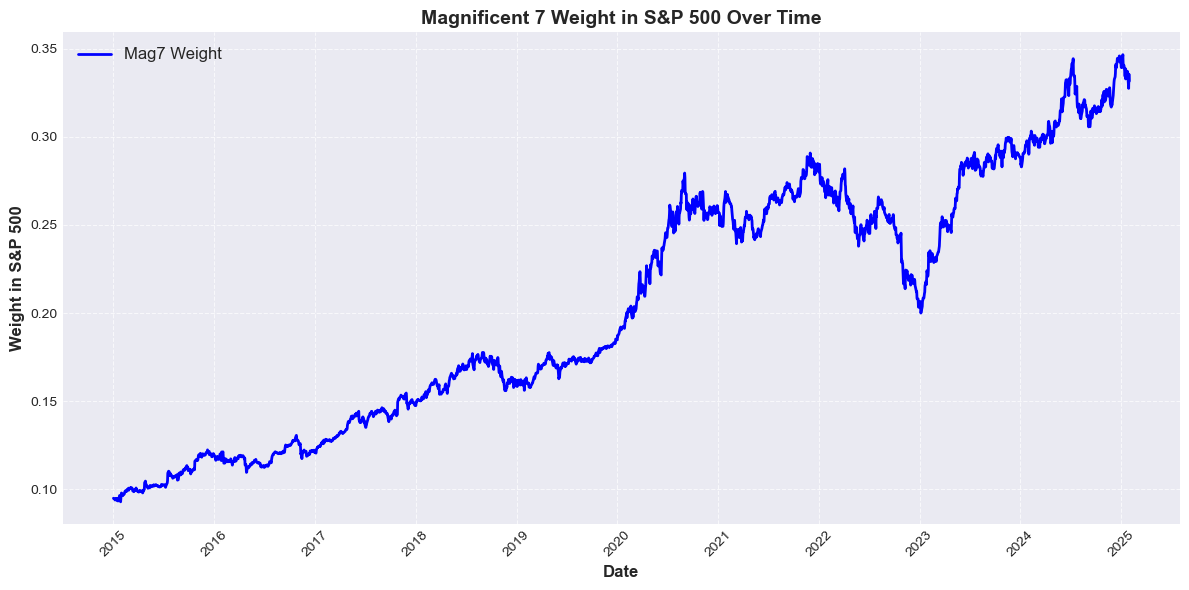

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
plt.style.use("seaborn-v0_8-darkgrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(weights.index, weights["Mag7_Weight"], label="Mag7 Weight", color="blue", linewidth=2)

# Formatting the dates on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Show one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format as year
plt.xticks(rotation=45)

# Labels and title
ax.set_xlabel("Date", fontsize=12, fontweight="bold")
ax.set_ylabel("Weight in S&P 500", fontsize=12, fontweight="bold")
ax.set_title("Magnificent 7 Weight in S&P 500 Over Time", fontsize=14, fontweight="bold")

# Add grid and legend
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(fontsize=12, loc="upper left")

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()